In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Arc

In [3]:
# Bounds for the pitch
x_min = 0
x_max = 105
y_min = 0
y_max = 68

line_color = "grey"
line_thickness = 1.5
background = "w"
point_size = 20

arc_angle = 0
first = 0
second = 1

In [4]:
# Pitch markings

pitch_x = [0, 5.8, 11.5, 17, 50, 83, 88.5, 94.2, 100]

# pitch x = lines on the length of the pitch ie goal line, six yard box, penalty spot, edge of box, halfway line

pitch_y = [0, 21.1, 36.6, 50, 63.2, 78.9, 100]

#pitch_y = lines on the width of the pitch ie sideline, edge of box, six yard box, centre of pitch, six yard box, edge of box, sideline

goal_y = [45.2, 54.8]

#goal posts

In [5]:
# Convert the ptich markings to metres

x_conversion = 105 / 100
y_conversion = 68 / 100

pitch_x = [item * x_conversion for item in pitch_x]

pitch_y = [item * y_conversion for item in pitch_y]

goal_y = [item * y_conversion for item in goal_y]

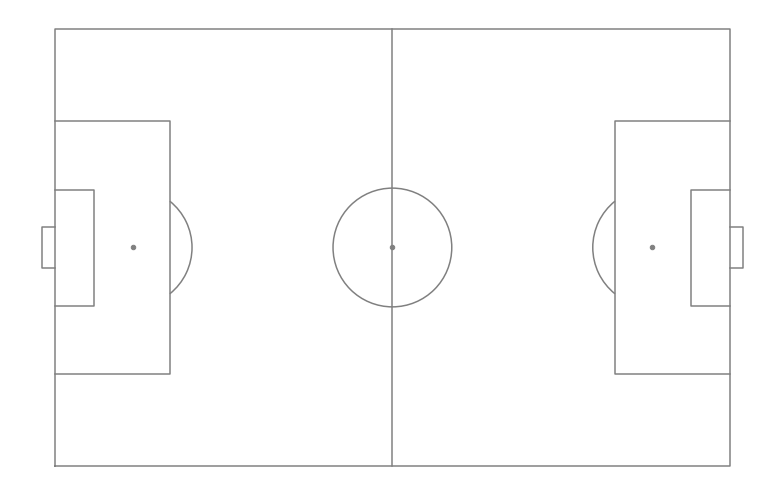

In [10]:
# Plot the pitch markings 
# Plotting the side and goal lines
lx1 = [x_min, x_max, x_max, x_min, x_min]
ly1 = [y_min, y_min, y_max, y_max, y_min]

#Plotting outer box
lx2 = [x_max, pitch_x[5], pitch_x[5], x_max]
ly2 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

lx3 = [0, pitch_x[3], pitch_x[3], 0]
ly3 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

#PLotting goals
lx4 = [x_max, x_max+2, x_max+2, x_max]
ly4 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

lx5 = [0, -2, -2, 0]
ly5 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

#plotting 6 yard boxes
lx6 = [x_max, pitch_x[7], pitch_x[7], x_max]
ly6 = [pitch_y[2], pitch_y[2], pitch_y[4], pitch_y[4]]

lx7 = [0, pitch_x[1], pitch_x[1], 0]
ly7 = [pitch_y[2], pitch_y[2], pitch_y[4], pitch_y[4]]

#Plotting Halfway line, penalty spots and kickoff spot
lx8 = [pitch_x[4], pitch_x[4]]
ly8 = [0, y_max]

lines = [
    [lx1, ly1],
    [lx2, ly2],
    [lx3, ly3],
    [lx4, ly4],
    [lx5, ly5],
    [lx6, ly6],
    [lx7, ly7],
    [lx8, ly8]
]

points = [
    [pitch_x[6], pitch_y[3]],
    [pitch_x[2], pitch_y[3]],
    [pitch_x[4], pitch_y[3]]
]

# Plotting the centre circle and Ds
circle_points = [pitch_x[4], pitch_y[3]]
arc_points1 = [pitch_x[6], pitch_y[3]]
arc_points2 = [pitch_x[2], pitch_y[3]]

fig, ax = plt.subplots(figsize =(11,7))
ax.axis("off")

for line in lines:
    ax.plot(line[first], line[second], color = line_color, lw = line_thickness, zorder = -1)

for point in points:
    ax.scatter(point[first], point[second], color = line_color, s = point_size, zorder = -1)
    
circle = plt.Circle((circle_points[first], circle_points[second]), x_max * 0.088, lw = line_thickness, color = line_color, fill = False, zorder = -1)
ax.add_artist(circle)

arc1 = Arc((arc_points1[first], arc_points1[second]), height = x_max * 0.088 *2, width = x_max * 0.088 * 2, angle = arc_angle, theta1 = 128.75, theta2 = 231.25, color = line_color, lw = line_thickness, zorder = -1)
ax.add_artist(arc1)

arc2 = Arc((arc_points2[first], arc_points2[second]), height = x_max * 0.088 * 2, width = x_max * 0.088 * 2, angle = arc_angle, theta1 = 308.75, theta2 = 51.25, color = line_color, lw = line_thickness, zorder = -1)
ax.add_artist(arc2)

ax.set_aspect("equal")# keeps circles in correct shape    
plt.tight_layout()
plt.show()

In [13]:
# Function to draw pitch

def draw_pitch (x_min = 0, x_max = 105, y_min = 0, y_max = 68, pitch_color = 'w', line_color = "grey", line_thickness = 1.5, point_size = 20, orientation = "horizontal", aspect = "full", ax = None):
    
    if not ax:
        raise TypeError("This function is intended to be used with an existing fig and ax in order to allow flexibility in plotting of various sizes and in subplots ")
        
    if orientation.lower().startswith("h"):
        first = 0
        second = 1
        arc_angle = 0
        
        if aspect == "half":
            ax.set_xlim(x_max / 2, x_max + 5)
            
    elif orientation.lower().startswith("v"):
        first = 1
        second = 0
        arc_angle = 90
        
        if aspect == "half":
            ax.set_ylim(x_max / 2, x_max + 5)
            
    else:
        raise NameError ("You must choose an orientation")
        
    ax.axis("off")
    
    rect = plt.Rectangle((x_min , y_min), x_max, y_max, facecolor = pitch_color, edgecolor = "none", zorder = -2)
    ax.add_artist(rect)
    
    x_conversion = x_max / 100
    y_conversion = y_max / 100
    
    pitch_x = [0, 5.8, 11.5, 17, 50, 83, 88.5, 94.2, 100]
    pitch_x = [x * x_conversion for x in pitch_x]
    
    pitch_y = [0, 21.1, 36.6, 50, 63.2, 78.9, 100]
    pitch_y = [x * y_conversion for x in pitch_y]
    
    goal_y = [45.2, 54.8]
    goal_y = [x * y_conversion for x in goal_y]
    
    lx1 = [x_min, x_max, x_max, x_min, x_min]
    ly1 = [y_min, y_min, y_max, y_max, y_min]
    
    lx2 = [x_max, pitch_x[5], pitch_x[5], x_max]
    ly2 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]
    
    lx3 = [0, pitch_x[3], pitch_x[3], 0]
    ly3 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]
    
    lx4 = [x_max, x_max + 2, x_max + 2, x_max]
    ly4 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]
    
    lx5 = [0, -2, -2 ,0]
    ly5 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]
    
    lx6 = [x_max, pitch_x[7], pitch_x[7], x_max]
    ly6 = [pitch_y[2], pitch_y[2], pitch_y[4], pitch_y[4]]
    
    lx7 = [0, pitch_x[1], pitch_x[1], 0]
    ly7 = [pitch_y[2], pitch_y[2], pitch_y[4], pitch_y[4]]
    
    lx8 = [pitch_x[4], pitch_x[4]]
    ly8 = [0, y_max]
    
    lines = [
        [lx1 , ly1],
        [lx2 , ly2],
        [lx3 , ly3],
        [lx4 , ly4],
        [lx5 , ly5],
        [lx6 , ly6],
        [lx7 , ly7],
        [lx8 , ly8]
    ]
    
    points = [
        [pitch_x[6], pitch_y[3]],
        [pitch_x[2], pitch_y[3]],
        [pitch_x[4], pitch_y[3]]
    ]
    
    circle_points = [pitch_x[4], pitch_y[3]]
    arc_points1 = [pitch_x[6], pitch_y[3]]
    arc_points2 = [pitch_x[2], pitch_y[3]]
    
    for line in lines:
        ax.plot(line[first], line[second], color = line_color, lw = line_thickness, zorder = -1)
        
    for point in points:
        ax.scatter(point[first], point[second], color = line_color, s = point_size, zorder = -1)
        
    circle = plt.Circle((circle_points[first],circle_points[second]), x_max * 0.088, lw = line_thickness, color = line_color, fill = False, zorder = -1)
    ax.add_artist(circle)
    
    arc1 = Arc((arc_points1[first], arc_points1[second]), height = x_max * 0.088 * 2, width = x_max * 0.088 * 2, angle = arc_angle, theta1 = 128.75, theta2 = 231.25, color = line_color, lw = line_thickness, zorder = -1)
    ax.add_artist(arc1)
    
    arc2 = Arc((arc_points2[first], arc_points2[second]), height = x_max * 0.088 * 2, width = x_max * 0.088 * 2, angle = arc_angle, theta1 = 308.75, theta2 = 51.25, color = line_color, lw = line_thickness, zorder = -1)
    ax.add_artist(arc2)
    
    ax.set_aspect("equal")
    
    return ax

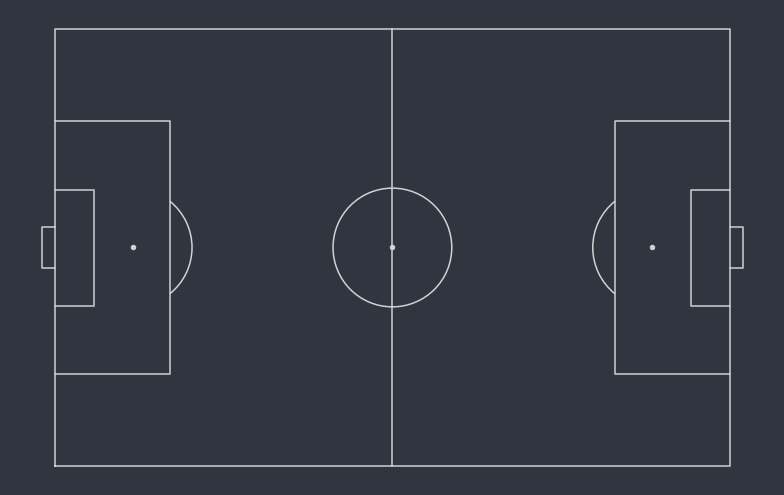

In [14]:
# Calling the function
background = "#303640"

fig, ax = plt.subplots(figsize = (11, 7))
fig.set_facecolor(background)

draw_pitch(orientation = "h", aspect = "full", pitch_color = background, line_color ="lightgrey", ax = ax)

plt.tight_layout()
plt.show()